In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

purchaseData = pd.read_csv("Purchase_Logistic.csv")

In [17]:
def head(X: list, n = 5) -> list:
    """
    return `n` (default is 5) first rows of a 2D list

    `X` : The 2D list
    `n` : number of first rows
    """
    return X[:n]

def tail(X: list, n = 5) -> list:
    """
    return `n` (default is 5) last rows of a 2D list

    `X` : The 2D list
    `n` : number of last rows
    """
    return X[(-n):]

In [19]:
X = purchaseData.iloc[:, [2,3]].values
head(X)

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [21]:
Y = purchaseData.iloc[:, 4].values
head(Y)

array([0, 0, 0, 0, 0], dtype=int64)

In [22]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [25]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,random_state=0)

In [26]:
logr = LogisticRegression()
logr.fit(Xtrain, Ytrain)
Ypred = logr.predict(Xtest)

In [27]:
cmat = confusion_matrix(Ytest, Ypred)

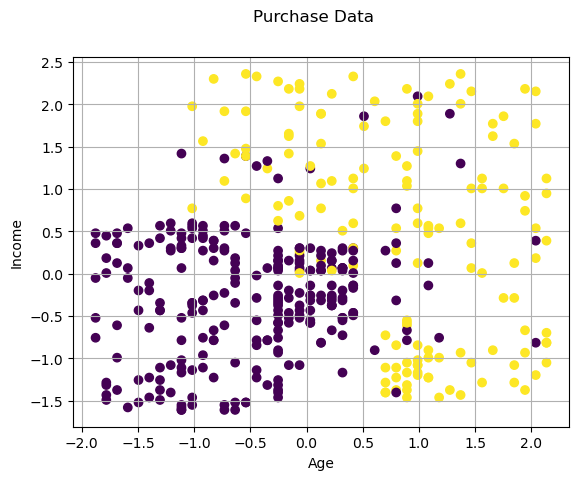

In [42]:
plt.figure(1)
u = scaler.mean_
s = np.sqrt(scaler.var_)
plt.scatter((X[:,0]), (X[:, 1]), c = Y)
plt.suptitle("Purchase Data")
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(1, which="both")
plt.axis("tight")
plt.show()

In [41]:
col = sigmoid(np.dot(X, np.transpose(logr.coef_)) + logr.intercept_)
print(head(X))
print(head(col))

[[-1.78179743 -1.49004624]
 [-0.25358736 -1.46068138]
 [-1.11320552 -0.78528968]
 [-1.01769239 -0.37418169]
 [-1.78179743  0.18375059]]
[[0.00151553]
 [0.03981968]
 [0.01356649]
 [0.02577917]
 [0.00938173]]


In [54]:
cf = logr.coef_
print(head(cf))
xplot = np.arange(-1, 1.5, 0.01)
yplot = -(cf[0,0]*xplot + logr.intercept_)/cf[0,1]
# the decision boundary is h.x + b = 0
# h.x is the dot product between h and x
# h = [cf[0,0], cf[0,1]] = cf
# x = [xplot, yplot]
# b = logr.intercept_

[[2.14341888 1.09386665]]


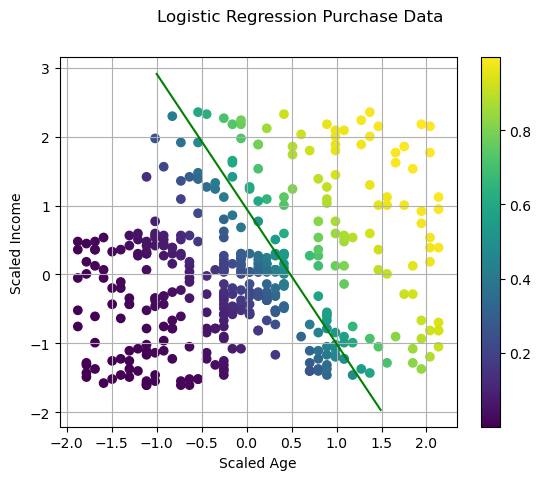

In [61]:
plt.figure(2)
plt.scatter(X[:, 0], X[:, 1], c = col)
plt.plot(xplot, yplot, 'g')
plt.colorbar()
plt.suptitle("Logistic Regression Purchase Data")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.grid(1, which="both")
plt.axis("tight")
plt.show()